In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv ('zomato.csv', encoding='ISO-8859-1')  # encoding="latin-1"

In [3]:
data[:5]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
print(data.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


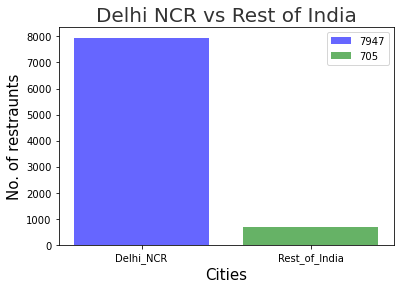

In [5]:
df = data.copy()
df = df[df['Country Code']==1]
NCR_df = df[ (df['City']=='New Delhi') | (df['City']=='Ghaziabad') | (df['City']=='Noida') | (df['City']=='Gurgaon') |
         (df['City']=='Faridabad')]

Total_city = df['City'].count()
NCR_city = NCR_df['City'].count()
Rest_India = Total_city - NCR_city

x = ['Delhi_NCR', 'Rest_of_India']
y = [NCR_city, Rest_India]
plt.bar(x[0],y[0],color='b',alpha=0.6)
plt.bar(x[1],y[1],color='g',alpha=0.6)
plt.ylabel("No. of restraunts",size=15)
plt.xlabel("Cities",size=15)
plt.title('Delhi NCR vs Rest of India',fontsize=20, color='black',alpha=0.8)
plt.legend(y)
plt.show()

In [6]:
df = data.copy()
df = df[df['Country Code'] == 1]
df['City'].replace(['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad'], 'Delhi_NCR', inplace = True)

Cuisines_NCR = df[df['City']=='Delhi_NCR']['Cuisines'].str.split(', ')
NCR_C = set()
for cuisine in Cuisines_NCR :
    NCR_C.update(cuisine)

Cuisines_RestI = df[df['City'] != 'Delhi_NCR']['Cuisines'].str.split(', ')
Rest_C = set()
for cuisine in Cuisines_RestI :
    Rest_C.update(cuisine)
    
cuisines = Rest_C - NCR_C
for i in cuisines :
    print(i, end = '  ')

Malwani  Cajun  German  BBQ  

In [7]:
df = data.copy()
df = df[df['Country Code'] == 1]
df['City'].replace(['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad'], 'Delhi_NCR', inplace = True)

NCR = []
Cuisines_NCR = df[df['City']=='Delhi_NCR']['Cuisines'].str.split(', ')
for i in Cuisines_NCR :
    NCR.extend(i)
    
Dict_NCR = {}
for cuisine in NCR :
    Dict_NCR[cuisine] = Dict_NCR.get(cuisine, 0)  + 1
        
key1 = sorted(Dict_NCR, key=Dict_NCR.get, reverse=True)
print('## Top 10 cuisines served by maximum number of restaurants in Delhi NCR ##')
NCR_Name = []
NCR_count = []
for i in key1[:10] :
    print(i, Dict_NCR[i])
    NCR_Name.append(i)
    NCR_count.append(Dict_NCR[i])
    
Cuisines_RestI = df[df['City'] != 'Delhi_NCR']['Cuisines'].str.split(', ')
Rest = []
for j in Cuisines_RestI :
    Rest.extend(j)
    
Dict_RestI = {}
for cuisine in Rest :
    Dict_RestI[cuisine] = Dict_RestI.get(cuisine, 0)  + 1

key2 = sorted(Dict_RestI, key=Dict_RestI.get, reverse=True)
print('## Top 10 cuisines served by maximum number of restaurants in Rest of India ##')
ROI_Name = []
ROI_Count = []
for j in key2[:10]:
    print(j, Dict_RestI[j])
    ROI_Name.append(j)
    ROI_Count.append(Dict_RestI[j])

## Top 10 cuisines served by maximum number of restaurants in Delhi NCR ##
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535
## Top 10 cuisines served by maximum number of restaurants in Rest of India ##
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


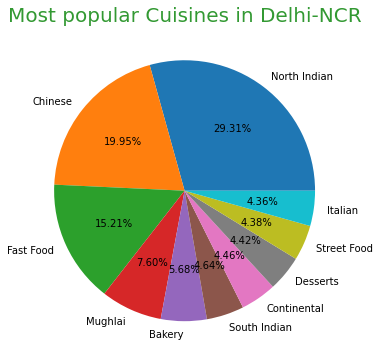

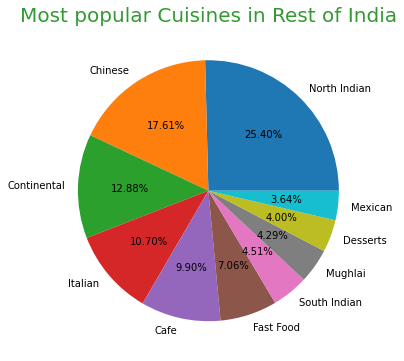

In [8]:
# By using NCR_count, NCR_Name, ROI_Count and ROI_Name for plotting graph from cusuines
plt.figure(figsize=(12,6))
plt.pie(NCR_count,labels=NCR_Name,autopct='%0.2f%%',radius=1)
plt.title('Most popular Cuisines in Delhi-NCR',fontsize=20, color='green',alpha=0.8)
plt.show()

plt.figure(figsize=(12,6))
plt.pie(ROI_Count,labels=ROI_Name,autopct='%0.2f%%',radius=1)
plt.title('Most popular Cuisines in Rest of India',fontsize=20, color='green',alpha=0.8)
plt.show()

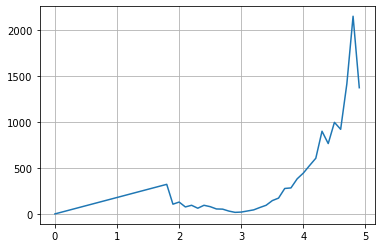

In [9]:
df = data.copy()
df = df[df['Country Code'] == 1]
df['Rating with Votes'] = df['Aggregate rating'].astype(str) + "##" + df['Votes'].astype(str)

range_with_votes = {}

def get_counts(rating_and_votes):
    rating = round(float(rating_and_votes.split("##")[0]),2)
    votes = int(float(rating_and_votes.split("##")[1]))
    if rating not in range_with_votes:
        range_with_votes[rating] = [votes,1]
    else:
        range_with_votes[rating][0]+=votes
        range_with_votes[rating][1]+=1
    

df['Rating with Votes'].apply(get_counts)

total_votes_rating = [[key,value[0]//value[1]] for key,value in range_with_votes.items()]

total_votes_rating.sort()
total_votes = [i[1] for i in total_votes_rating]
rating = [i[0] for i in total_votes_rating]

plt.plot(rating,total_votes)
plt.grid()
plt.show()

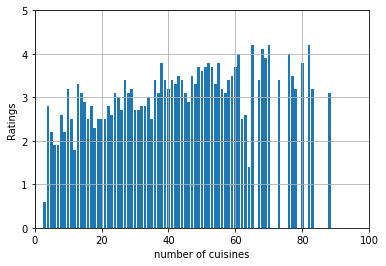

In [10]:
df = data.copy()
df = df[df['Country Code'] == 1]
Ratings = np.array(df['Aggregate rating'])
Cuisines = np.array(df['Cuisines'])

rating_and_num_cuisines = {}

for i in range(len(Ratings)):
    num_cuisines = len(Cuisines[i])
    if num_cuisines not in rating_and_num_cuisines:
        rating_and_num_cuisines[num_cuisines] = [[Ratings[i]],1]
    else:
        rating_and_num_cuisines[num_cuisines][0].append(Ratings[i])
        rating_and_num_cuisines[num_cuisines][1]+=1

num_cuisines_with_avg_rating = [] # print(num_cuisines_with_avg_rating)

for key, value in rating_and_num_cuisines.items():
    avg_rating = round(sum(value[0])/value[1],1)
    num_cuisines_with_avg_rating.append([key,avg_rating])
num_cuisines_with_avg_rating.sort(reverse=True)
no_cuisines_present = [i[0] for i in num_cuisines_with_avg_rating]
avg_ratings = [i[1] for i in num_cuisines_with_avg_rating]

plt.bar(no_cuisines_present,avg_ratings)
plt.xlabel("number of cuisines")
plt.ylabel("Ratings")
plt.axis([0,100,0,5])
plt.grid()
plt.show()

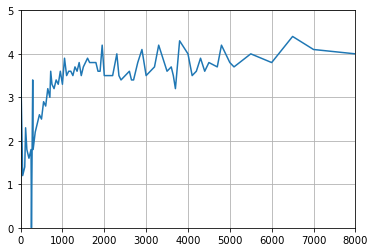

In [11]:
df = data.copy()
df = df[df['Country Code'] == 1]
ratings = np.array(df['Aggregate rating'])
cost_of_two = np.array(df['Average Cost for two'])

rating_with_cost_of_two = {}

for i in range(len(ratings)):
    if cost_of_two[i] not in rating_with_cost_of_two:
        rating_with_cost_of_two[cost_of_two[i]] = [[ratings[i]],1]
    else:
        rating_with_cost_of_two[cost_of_two[i]][0].append(ratings[i])
        rating_with_cost_of_two[cost_of_two[i]][1]+=1

cost_of_two_with_avg_rating = [] # print(no_cuisines_with_avg_rating)

for key, value in rating_with_cost_of_two.items():
    avg_rating = round(sum(value[0])/value[1],1)
    cost_of_two_with_avg_rating.append([key,avg_rating])
cost_of_two_with_avg_rating.sort(reverse=True)
cost_of_two = [i[0] for i in cost_of_two_with_avg_rating]
avg_ratings = [i[1] for i in cost_of_two_with_avg_rating]

plt.plot(cost_of_two,avg_ratings)
plt.axis([0,8000,0,5])
plt.grid()
plt.show()

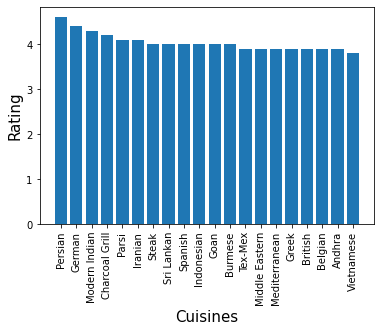

In [12]:
df = data.copy()
df = df[df['Country Code'] == 1]
cuisines_with_rating = {} 
ratings = np.array(df['Aggregate rating'])
cuisines = np.array(df['Cuisines'])

for i in range(len(cuisines)):
    cuisine_list = cuisines[i].split(', ')
    for cuisine in cuisine_list:
        if cuisine not in cuisines_with_rating:
            cuisines_with_rating[cuisine] = [[ratings[i]],1]
        else:
            cuisines_with_rating[cuisine][0].append(ratings[i])
            cuisines_with_rating[cuisine][1]+=1

cuisines_ratings = [ [round(sum(value[0])/value[1],1),key] for key,value in cuisines_with_rating.items()]

cuisines_ratings.sort(reverse=True)
cuisines = []
ratings = []
for i in cuisines_ratings:
    cuisines.append(i[1])
    ratings.append(i[0])

plt.bar(cuisines[0:20],ratings[0:20])
plt.xticks(rotation=90)
plt.xlabel("Cuisines", size=15)
plt.ylabel("Rating", size = 15)
plt.show()

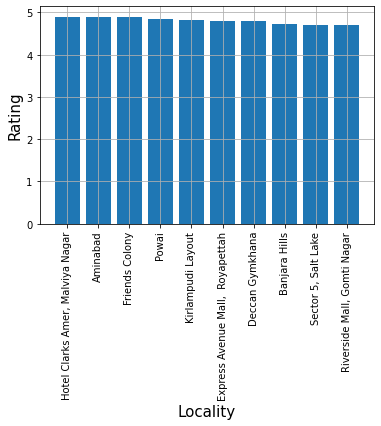

In [13]:
df = data.copy()
df = df[df['Country Code'] == 1]
locality_dict = {}

localities = np.array(df['Locality'])
restaurants = np.array(df['Restaurant Name']) 
ratings = np.array(df['Aggregate rating'])
votes = np.array(df['Votes'])

for i in range(len(localities)):
    if votes[i]!=0:
        if localities[i] not in locality_dict:
            locality_dict[localities[i]] = [votes[i]*ratings[i],votes[i]]
        else:
            locality_dict[localities[i]][0] += votes[i]*ratings[i]
            locality_dict[localities[i]][1] += votes[i]

locality_ratings = []
for key,value in locality_dict.items():
    weighted_rating = round(value[0]/value[1],2)
    locality_ratings.append([weighted_rating,key])

locality_ratings.sort(reverse=True)
localities = [ i[1] for i in locality_ratings][0:10]
ratings = [ i[0] for i in locality_ratings][0:10]

plt.bar(localities,ratings)
plt.xticks(rotation=90)
plt.ylabel("Rating", size = 15)
plt.xlabel("Locality", size = 15)
plt.grid()
plt.show()

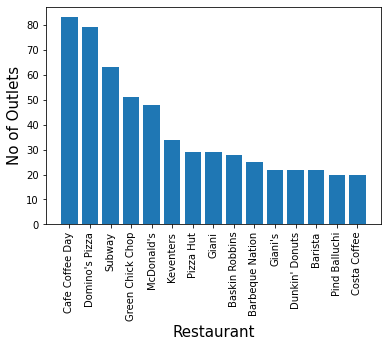

In [14]:
df = data.copy()
df = df[df['Country Code']==1]

restaurants_outlet_count = {}

def count_outlets(name):
    restaurants_outlet_count[name] = restaurants_outlet_count.get(name,0)+1
df['Restaurant Name'].apply(count_outlets)

restaurant_names_counts = [ [value,key] for key,value in restaurants_outlet_count.items()]
restaurant_names_counts.sort(reverse=True)
restaurants_name = [ i[1] for i in restaurant_names_counts][:15]
counts = [ i[0] for i in restaurant_names_counts][:15]
plt.bar(restaurants_name,counts)
plt.xticks(rotation=90)
plt.xlabel("Restaurant", size=15)
plt.ylabel("No of Outlets",size = 15)
plt.show()

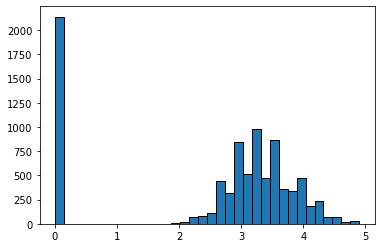

In [15]:
df = data.copy()
df = df[df['Country Code']==1]
zomato_ratings = df[df['Rating text']!='Not Rated'].copy()
ratings = np.array(zomato_ratings['Aggregate rating'])
nan_ratings = np.isnan(ratings)
not_nan_ratings = ~ nan_ratings
ratings = ratings[not_nan_ratings]

xt = np.arange(6)
plt.hist(ratings,bins = "auto", edgecolor = "black")
plt.xticks(xt)
plt.show()

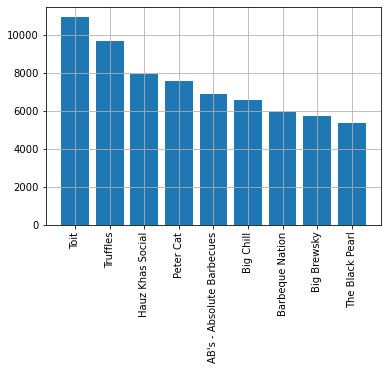

In [16]:
name_with_address_and_votes = {}
def get_votes(votes_with_name_address):
    votes = int(votes_with_name_address.split("###")[0])
    name_with_address = votes_with_name_address.split("###")[1]
    name_with_address_and_votes[name_with_address] = name_with_address_and_votes.get(name_with_address,0) + votes
    return votes_with_name_address

zomato_ratings['Votes_with_City'] = zomato_ratings['Votes'].astype(str)+"###" + zomato_ratings['Restaurant Name']+"$$$"+zomato_ratings['Locality']
zomato_ratings['Votes_with_City'].apply(get_votes)

votes_names = [[value,key] for key,value in name_with_address_and_votes.items()]
votes_names.sort(reverse=True)

votes = [i[0] for i in votes_names][:10]
names = [i[1].split("$$$")[0] for i in votes_names][:10]
plt.bar(names,votes)
plt.grid()
plt.xticks(rotation=90)
plt.show()

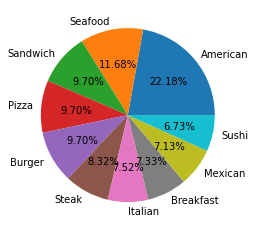

In [21]:
df = data.copy()
zomato_usa_df = df[df['Country Code']==216].copy()
zomato_usa_df['Cuisines'].dropna(inplace=True)
cuisines_count_in_usa = {}

def get_cuisines(cuisines):
    cuisines = str(cuisines)
    if cuisines != "":
        for cuisine in cuisines.split(', '):
            cuisines_count_in_usa[cuisine] = cuisines_count_in_usa.get(cuisine,0)+1
    return cuisines

zomato_usa_df['Cuisines'].apply(get_cuisines)
count_cuisines = [[value,key] for key,value in cuisines_count_in_usa.items()]
count_cuisines.sort(reverse=True)
counts = [i[0] for i in count_cuisines][:10]
cuisine_names = [i[1] for i in count_cuisines][:10]
plt.pie(counts,labels=cuisine_names, autopct = '%1.2f%%')
plt.show()


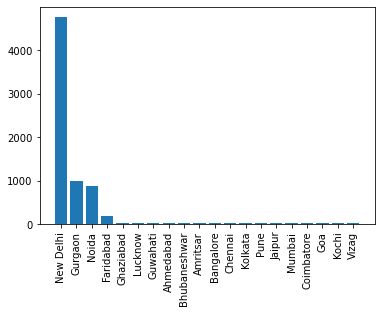

In [25]:
df = data.copy()
df = df[df['Country Code'] == 1]
city_dict = {}

cities = np.array(df['City'])
ratings = np.array(df['Aggregate rating'])
votes = np.array(df['Votes'])

for i in range(len(cities)):
    if votes[i]!=0:
        if cities[i] not in city_dict:
            city_dict[cities[i]] = [votes[i]*ratings[i],votes[i],1]
        else:
            city_dict[cities[i]][0] += votes[i]*ratings[i]
            city_dict[cities[i]][1] += votes[i]
            city_dict[cities[i]][2] +=1

city_ratings = []
for key,value in city_dict.items():
    city = key
    weighted_rating = round(value[0]/value[1],2)
    city_ratings.append([value[2],weighted_rating,key])
    
city_ratings.sort(reverse=True)
cities = np.array([ i[2] for i in city_ratings][0:20])
ratings = np.array([ i[1] for i in city_ratings][0:20])
ratings = ratings-3
counts = np.array([ i[0] for i in city_ratings][0:20])
ratings[ratings[0]<0] = -ratings[0]

plt.bar(cities,counts)
plt.xticks(rotation=90)
plt.show()